# import, DB 연결

In [508]:
import pymysql
import pandas as pd
import numpy as np
from functools import reduce

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_seq_items', None)

In [348]:
con = pymysql.connect(host='127.0.0.1'\
                      ,user = 'root'\
                      ,password = ''\
                      ,db='rome_test'\
                      ,charset='utf8'
                     )

In [4]:
#con.close() # 연결 종료

# 기본정보

* 제외 조건
    * scc_doll 테이블에서 host_user_id 값이 '테스트계정정보' 시트에 있는 값과 일치하는 경우, 테스트 계정에서 생성된 데이터이므로 분석에서 제외함. 
    * scc_user 테이블에서 기관코드가 없는 사용자는 분석에서 제외 (where agency_code ='')
    * 유효데이터 기간 범위는 2019.04 ~ 2021.05으로, 해당 기간 이외 레코드는 더미/테스트 데이터를 포함하므로 분석에서 제외하는 것을 권장함.
    * 설문데이터 내 id, id_guro 컬럼 중 6자리로 구성된 값을 Key 값으로 하여 데이터베이스의 host_user_id 값과 매핑함.

In [15]:
table_list = ['scc_doll'
,'scc_doll_option'
,'scc_agency'
,'scc_user'
,'scc_user_doll_group'
]

In [16]:
df_list = []
for i in table_list:
    sql = 'select * from {}'.format(i)
    globals()[i] = pd.read_sql(sql, con)
    df_list.append(globals()[i])

## scc_user

id는 user id

In [398]:
df_scc_user = scc_user.copy()

In [399]:
df_scc_user.sample(3)

,id,userID,password,name,phoneNum,push_instance_id,is_resign,pic_file_name,alarm_emergency,alarm_low_bettery,alarm_disconnect,agency_code,alarm_emergency_call,alarm_high_temp,reg_date
903,8907,b'v\x08\x88\xb6\x80\xbbZ\xaf\\7v\xd2?\xb9\x19\...,b'\xcd2$\x10qQ=}\x04\x9b\xb9\x14E\x16\x11*',b'#\x9bvi\xe8\t\xc1\xdc\xb2o\x1e\xef\xfb\xa9!\...,b'\xc6\x06tM\x0b\xb6\x88\xb9\xa9;\xb4nW\r\xf0\...,5703e1b462ea4ca5aa0e8aa3b043fa7877b58e9cec013e...,1,None,1,1,0,000000000001,1,1,2021-03-16 14:38:19
1232,8238,b'\xcc5O\xc0\x90\xfa(\x08]C`\x9c\x92\xeb\xd0\\',"b""_\x11\xc9'>6SWI\xe6Wk\xbf\x1d\xbfw""",b'\xad\xd0t\x07F6\xa7\x0fg\r\xa2\x8e\x072v{',b'\nUP\xe9\x9d\xfd\xefF\x8a\x938\xe9reM\x8f',dWzzixctKEs:APA91bHpWZK02rXmGwLWe1GY90nsVmwdUq...,0,None,1,1,0,000000000001,1,1,2020-11-25 10:41:40
1391,8406,b')\xb2-vz\x05\x1e\xb6\x8e5\xd8#\xad\xd3.\xc2',b':Cp;U\xd4\xd2\x175\xa7\xa5\xad)\xee\xdf\xde',"b""\x91\x08\x19\xf0\x1d\x87\xa3C\xad\xd2\xde\x0...","b'\xe6c\xb7\x8f\x87""\xbbt\xc9\xab\'\x0e\x17\x1...",ad2fff587c944776c628ecb7aee0a5a3f949328bd2904a...,1,None,1,0,0,043011002005,0,1,2020-11-25 10:41:40


In [400]:
df_scc_user.shape

(2132, 15)

In [401]:
df_scc_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2132 non-null   int64         
 1   userID                2132 non-null   object        
 2   password              2132 non-null   object        
 3   name                  2132 non-null   object        
 4   phoneNum              2132 non-null   object        
 5   push_instance_id      2069 non-null   object        
 6   is_resign             2132 non-null   int64         
 7   pic_file_name         129 non-null    object        
 8   alarm_emergency       2132 non-null   int64         
 9   alarm_low_bettery     2132 non-null   int64         
 10  alarm_disconnect      2132 non-null   int64         
 11  agency_code           2132 non-null   object        
 12  alarm_emergency_call  2132 non-null   int64         
 13  alarm_high_temp   

* 테스트 데이터 제거 : agency_code == '' 제거

In [402]:
# 제외할 user 조건 : 'agency_code'] == ''
user_list = list(df_scc_user[df_scc_user['agency_code'] == '']['id'])

In [403]:
# ''user 제거하고 정상만 남기기
df_scc_user = df_scc_user[df_scc_user['agency_code'] != '']

In [404]:
df_scc_user.shape

(2088, 15)

In [405]:
df_scc_user.columns

Index(['id', 'userID', 'password', 'name', 'phoneNum', 'push_instance_id',
       'is_resign', 'pic_file_name', 'alarm_emergency', 'alarm_low_bettery',
       'alarm_disconnect', 'agency_code', 'alarm_emergency_call',
       'alarm_high_temp', 'reg_date'],
      dtype='object')

In [406]:
# 분석에 사용한 컬럼
scc_user_y_col = ['id', 'is_resign', 'agency_code']

In [407]:
df_scc_user = df_scc_user[scc_user_y_col]

In [408]:
# 컬럼 이름 바꾸기
df_scc_user.rename(columns={'id':'host_user_id'}, inplace=True)

In [409]:
df_scc_user.sample(3)

,host_user_id,is_resign,agency_code
1888,8936,0,000000000001
193,7271,1,9
1531,8729,0,000000000001


## scc_agency

In [389]:
df_scc_agency = scc_agency.copy()

In [390]:
df_scc_agency.sample(3)

,id,name,phone,address,email
86,211126003001,서울 의료원,None,None,None
13,014833001001,양산시청 사회복지과,None,None,None
16,024623001901,광양시 재가,None,None,None


In [391]:
df_scc_agency.shape

(188, 5)

In [392]:
# 사용할 컬럼만 선택
df_scc_agency = df_scc_agency[['id', 'name']]

In [411]:
df_scc_agency.rename(columns={'id':'agency_code'
                             ,'name':'agency_name'}, inplace=True)

In [412]:
df_scc_agency.sample(3)

,agency_code,agency_name
137,451168004001,수서 종합사회복지관
36,032729002002,범물복지관
186,992009231000,임베디드센터


## scc_doll

In [90]:
df_scc_doll = scc_doll.copy()

In [91]:
df_scc_doll.sample(3)

,id,host_user_id,name,phone_num,battery,active_monitor,sex,birthday,religion,wakeup,...,sleep,drug_option,ventilation_walk,is_edited,activeSenceTime,pic_file_name,is_delete,mac_id,regsted_date,disease
3977,126526,7600,"b""6\x95\x1b'\xa6\x90\xf0x\xb8\xf3\x06\xff\x978...",b'\xbdf\x92\xd6h=\xf7>\xdeb\xe4\xa0\x9a\x0c9H',67,24,2,1940-06-01,1,0 days 07:00:00,...,0 days 22:00:00,0000000,0,1,24,,1,861760040217827,2019-09-02 15:42:51,000
353,356,18,b')\x1dS\xb74\x8bo\x01(\xa1f\xa6lNz\n',b'\x90J\xddd\xe5\x99\x01\x01o\xb8<j\xa95\x8cs',0,24,1,1940-06-01,1,0 days 07:00:00,...,0 days 23:00:00,00000000,0,1,24,,1,5c:cf:7f:b0:be:05,2018-11-12 14:54:14,000
5101,127655,7530,b'\xb1J1\xbe\x9b\xf2D=\x98f\xdes\x8a\xe5\xb7\xd4',b'\xbdf\x92\xd6h=\xf7>\xdeb\xe4\xa0\x9a\x0c9H',62,2,1,1940-06-23,1,0 days 07:00:00,...,0 days 22:00:00,1110000,3,0,2,,1,861760040217751,2020-01-14 10:28:00,000


In [92]:
df_scc_doll.shape

(12496, 23)

In [93]:
df_scc_doll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12496 entries, 0 to 12495
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                12496 non-null  int64          
 1   host_user_id      12496 non-null  int64          
 2   name              12496 non-null  object         
 3   phone_num         12496 non-null  object         
 4   battery           12496 non-null  int64          
 5   active_monitor    12496 non-null  int64          
 6   sex               12496 non-null  int64          
 7   birthday          12495 non-null  object         
 8   religion          12496 non-null  int64          
 9   wakeup            12495 non-null  timedelta64[ns]
 10  breakfast         12495 non-null  timedelta64[ns]
 11  lunch             12495 non-null  timedelta64[ns]
 12  dinner            12495 non-null  timedelta64[ns]
 13  sleep             12495 non-null  timedelta64[ns]
 14  drug_o

* 테스트 user_id 제외

In [94]:
test_host_user_id = [7259,7260,7261,7262,7264,7265,7266,7267,7268,7269,7270,7271,7272,7275,7276,7277,7278,7279,7280,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7338,7341,7342,7343,7345,7346,7347,7348,7350,7388,7443,7511,7525,7530,7591,7979,8013]

In [95]:
df_scc_doll = df_scc_doll.loc[~df_scc_doll.host_user_id.isin(test_host_user_id)]

In [96]:
df_scc_doll.shape

(10032, 23)

* 기관id 없는 user_id 제외

In [98]:
df_scc_doll = df_scc_doll[~df_scc_doll['host_user_id'].isin(user_list)]

In [99]:
df_scc_doll.shape

(10016, 23)

* 날짜 필터링 (2019.04 ~ 2021.05)

In [100]:
df_scc_doll = df_scc_doll.loc[(df_scc_doll['regsted_date'] >= '2019-04-01') &\
                                 (df_scc_doll['regsted_date'] <= '2021-05-31')]

In [101]:
df_scc_doll.host_user_id.value_counts()

8057    1997
9076     802
96       380
7599     376
7506     139
        ... 
8406       1
7499       1
8370       1
8362       1
9082       1
Name: host_user_id, Length: 846, dtype: int64

In [102]:
df_scc_doll.shape

(7789, 23)

In [103]:
# 사용하지 않을 컬럼 제거
df_scc_doll.drop(['name','phone_num','battery','active_monitor','is_edited',\
                  'activeSenceTime','pic_file_name','is_delete','mac_id','regsted_date'], axis=1, inplace=True)

In [104]:
df_scc_doll.sample(3)

,id,host_user_id,sex,birthday,religion,wakeup,breakfast,lunch,dinner,sleep,drug_option,ventilation_walk,disease
11546,134101,9076,1,1940-06-23,1,0 days 07:00:00,0 days 08:00:00,0 days 10:00:00,0 days 18:00:00,0 days 22:00:00,0000000,3,000
11775,134330,9032,2,1940-06-01,3,0 days 08:00:00,0 days 09:00:00,0 days 12:00:00,0 days 18:00:00,0 days 22:00:00,0101010,3,011
2735,125281,96,2,1941-09-19,1,0 days 04:00:00,0 days 07:00:00,0 days 12:00:00,0 days 19:00:00,0 days 21:00:00,0100000,3,000


## scc_doll_option

In [111]:
df_scc_doll_option = scc_doll_option.copy()

In [142]:
df_scc_doll_option.sample(3)

,doll_id,connection_type,serial_number,charms_mode,no_alarm,custom_timer1,custom_timer2,custom_timer3,custom_timer4,custom_timer5,religion_alarm,calender_type,is_edited,is_active_detect,appellation,right_ear_function,left_ear_function
9484,132884,2,01C200401948,1,0,07:00:00,,,,,0,1,0,0,10000,0100000,1000000
279,123679,0,01W180100003,1,0,07:00:00,,,,,0,0,0,0,10000,0000001,0000010
2733,126133,2,01C190800401,1,0,07:00:00,,,,,0,1,0,0,10000,0000001,0000010


In [53]:
df_scc_doll_option.charms_mode.value_counts()

1    11423
0      208
Name: charms_mode, dtype: int64

* 타이머 설정되어 있는 횟수 -> 새로운 컬럼 만들기

In [164]:
timer_col = ['custom_timer1', 'custom_timer2', 'custom_timer3', 'custom_timer4', 'custom_timer5']

In [177]:
df_scc_doll_option.loc[:, timer_col] = df_scc_doll_option.loc[:, timer_col].replace('', np.NaN)

In [178]:
df_scc_doll_option

,doll_id,connection_type,serial_number,charms_mode,no_alarm,custom_timer1,custom_timer2,custom_timer3,custom_timer4,custom_timer5,religion_alarm,calender_type,is_edited,is_active_detect,appellation,right_ear_function,left_ear_function,test
0,29,0,01W181000019,0,0,07:00:00,08:00:00,13:00:00,18:00:00,23:00:00,0,1,0,1,10000,0000001,0000010,08:00:00
1,33,0,01W181000019,0,0,07:00:00,08:00:00,13:00:00,18:00:00,23:00:00,0,1,0,1,10000,0000001,0000010,08:00:00
2,43,0,01W181000019,0,0,07:00:00,08:00:00,13:00:00,18:00:00,23:00:00,0,1,0,1,10000,0000001,0000010,08:00:00
3,69,0,01W181000019,0,0,07:00:00,08:00:00,13:00:00,18:00:00,23:00:00,0,1,0,1,10000,0000001,0000010,08:00:00
4,215,0,01W181000019,1,1,07:00:00,08:00:00,13:00:00,18:00:00,23:00:00,1,1,0,1,10000,0000001,0000010,08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11626,135026,2,01C200400506,1,0,09:00:00,NaN,NaN,NaN,NaN,1,0,0,0,10000,0010001,1011110,NaN
11627,135027,2,01C200400506,1,0,09:00:00,NaN,NaN,NaN,NaN,0,0,0,0,10000,0010000,0100000,NaN
11628,135028,2,01C200400506,1,0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,10000,0010000,0000100,NaN
11629,135029,2,01C200402280,1,0,07:00:00,NaN,NaN,NaN,NaN,0,0,0,0,01000,000001000,111000011,NaN


In [183]:
df_scc_doll_option['custom_timer_cnt'] = df_scc_doll_option[timer_col].count(axis=1)

In [199]:
df_scc_doll_option = df_scc_doll_option[['doll_id', 'connection_type', 'no_alarm' 
                                        ,'custom_timer_cnt', 'religion_alarm','right_ear_function', 'left_ear_function']]

In [460]:
df_scc_doll_option.rename(columns={'doll_id':'id'}, inplace=True)

In [461]:
df_scc_doll_option.sample(3)

,id,connection_type,no_alarm,custom_timer_cnt,religion_alarm,right_ear_function,left_ear_function
9210,132610,2,0,1,0,0100000,1000000
6742,130142,2,0,1,0,0100000,1000000
6636,130036,2,0,1,0,0100000,1000000


## (제외) scc_user_doll_group

scc_user와 중복되는 듯

In [58]:
df_scc_user_doll_group = scc_user_doll_group.copy()

In [201]:
df_scc_user_doll_group.sample(3)

,id,doll_id,user_group_member_id,is_host,agency_code,reg_date
155,236,192,36,1,None,NaT
9377,14814,134611,9076,1,000000000002,2021-05-03 15:52:27
7615,12826,133015,8785,1,724213007001,2021-02-02 14:33:02


## 설문데이터

In [469]:
df_survey = pd.read_csv('data/survey_1.csv')

In [470]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Columns: 140 entries, no to DISE3
dtypes: float64(9), int64(5), object(126)
memory usage: 500.0+ KB


In [471]:
df_survey.shape

(457, 140)

In [472]:
df_survey.sample(5)

,no,id_new,id,id_guro,GP,sub_gp,SERIAL,born,age,sex,...,dq7_1,dq7_2,dq7_3,dq7_4,dq7_5,dq7_6,dq7_7,DISE1,DISE2,DISE3
432,289,127298,127298.0,199,구로,구로어르신돌봄통합센터,NaN,1935,84,여,...,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
90,242,125160,NaN,125160,광양,NaN,02N190200129,1937,83,여,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,383,126816,126816.0,60,구로,구로건강복지센터,NaN,1932,87,남,...,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
166,508,125263,NaN,125263,광양,NaN,02N190200159,1935,85,여,...,아침 식전,NaN,NaN,NaN,저녁 식전,NaN,NaN,NaN,NaN,NaN
271,254,125470,NaN,125470,광양,NaN,NaN,1932,88,여,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [473]:
# 컬럼 이름 바꾸기
df_survey.rename(columns={'id_new':'id', 'id':'id_old'}, inplace=True)

In [474]:
# 사용하지 않는 컬럼 삭제
df_survey.drop(['no','id_old','id_guro','SERIAL','born'], axis=1, inplace=True)

In [475]:
df_survey.head(3)

,id,GP,sub_gp,age,sex,type1,type2,type3,pa1,pa2,...,dq7_1,dq7_2,dq7_3,dq7_4,dq7_5,dq7_6,dq7_7,DISE1,DISE2,DISE3
0,125030,광양,NaN,75,여,NaN,NaN,NaN,NaN,NaN,...,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125031,광양,NaN,76,여,NaN,NaN,NaN,NaN,NaN,...,NaN,아침 식후,NaN,NaN,NaN,저녁 식후,NaN,NaN,NaN,NaN
2,125032,광양,NaN,78,여,NaN,NaN,NaN,NaN,NaN,...,NaN,아침 식후,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 로그 관련

## log_doll

In [72]:
sql_log_doll = '''
select * from rome_test.log_doll
	where doll_id in (
		select id from rome_test.scc_doll 
		where host_user_id not in (7259,7260,7261,7262,7264,7265,7266,7267,7268,7269,7270,7271,7272,7275,7276,7277,7278,7279,7280,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7338,7341,7342,7343,7345,7346,7347,7348,7350,7388,7443,7511,7525,7530,7591,7979,8013)
			and host_user_id not in (select id from rome_test.scc_user where agency_code = '')
			and regsted_date between '2019-04-01 00:00:00' and '2021-05-31 23:59:59'
		)
'''

In [73]:
log_doll = pd.read_sql(sql_log_doll, con)

In [210]:
df_log_doll = log_doll.copy()

In [221]:
df_log_doll.sample(5)

,doll_id,stroke,hand_hold,knock,human_detection,gymnastics,brain_timer,battery,date,last_none_action_time
26387537,127241,0,0,0,0,0,0,99,2020-05-07 18:25:32,2020-05-07 18:20:09
19474583,126823,0,0,0,1,0,0,100,2020-03-07 00:55:27,2020-03-07 00:55:27
75027707,127039,0,0,0,0,0,0,100,2021-02-24 17:51:13,2021-02-24 14:36:01
91647035,127309,0,0,0,0,0,0,82,2021-05-09 02:35:51,2021-05-08 07:49:15
16176841,125184,0,0,0,56,0,0,74,2020-02-05 04:23:18,2020-02-05 04:23:18


In [228]:
# 전체 갯수
df_log_doll.shape

(92574951, 10)

<AxesSubplot:>

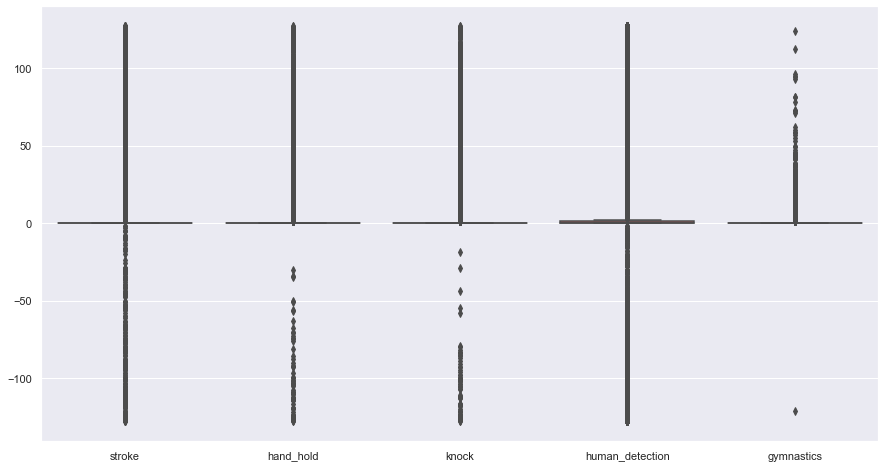

In [257]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=df_log_doll.iloc[:, 1:6])

* 음수 제외

In [ ]:
# 변수별 음수값 갯수
for i in df_log_doll.columns[1:7]:
    neg_cnt = df_log_doll[df_log_doll[i] < 0].shape[0]
    print(i, neg_cnt)

In [281]:
# 음수값 있는 row 조건 
neg = ((df_log_doll['stroke'] < 0) 
        |(df_log_doll['hand_hold'] < 0)
        |(df_log_doll['knock'] < 0)
        |(df_log_doll['human_detection'] < 0)
        |(df_log_doll['gymnastics'] < 0)
        |(df_log_doll['brain_timer'] < 0)) # 25025

In [283]:
# 음수값 예시
df_log_doll[neg]

,doll_id,stroke,hand_hold,knock,human_detection,gymnastics,brain_timer,battery,date,last_none_action_time
33809,125206,15,72,5,-120,2,2,100,2019-04-07 02:12:21,2019-04-07 02:12:21
42686,125206,13,44,16,-118,0,2,89,2019-04-07 14:48:04,2019-04-07 14:48:04
45612,125206,6,5,1,-14,0,0,80,2019-04-07 18:58:36,2019-04-07 18:58:36
89732,125065,-99,0,17,22,0,0,100,2019-04-10 19:19:15,2019-04-10 19:19:15
89736,125157,1,0,-104,20,0,0,100,2019-04-10 19:19:37,2019-04-10 19:19:37
...,...,...,...,...,...,...,...,...,...,...
92561143,128546,2,0,3,-123,0,0,100,2021-05-12 19:49:15,2021-05-12 19:49:15
92563703,133000,0,0,0,-128,0,0,100,2021-05-12 20:11:59,2021-05-12 20:11:59
92564599,128546,0,0,0,-122,0,0,100,2021-05-12 20:17:10,2021-05-12 20:17:10
92569538,128546,0,0,0,-124,0,0,100,2021-05-12 20:45:13,2021-05-12 20:45:13


In [284]:
# 음수값 제외
df_log_doll = df_log_doll[~neg]

* group by

In [534]:
# doll id 그룹 내 기간(day) 계산을 위한 함수
def days(s):
    return pd.Timedelta((s.max()-s.min()), unit='d').days

In [535]:
df_log_doll.loc[df_log_doll['doll_id'] == '127034', 'date']

4334094   2019-10-10 15:48:50
4334188   2019-10-10 15:51:32
4334312   2019-10-10 15:55:45
4334495   2019-10-10 16:00:41
4334706   2019-10-10 16:06:45
                  ...        
4663655   2019-10-16 14:55:18
4663887   2019-10-16 15:00:45
4664128   2019-10-16 15:06:09
4664394   2019-10-16 15:12:23
4664643   2019-10-16 15:18:06
Name: date, Length: 1568, dtype: datetime64[ns]

In [317]:
# 테스트
t = df_log_doll.loc[df_log_doll['doll_id'] == '127034', 'date']
pd.Timedelta((t.max()\
              - t.min()), unit='d').days

5

In [536]:
df_log_doll_gr = df_log_doll\
                    .groupby(['doll_id'], as_index=False)\
                    .agg({'stroke':'sum'
                            ,'hand_hold':'sum'
                            ,'knock':'sum'
                            ,'human_detection':'sum'
                            ,'gymnastics':'sum'
                            ,'brain_timer':'sum'
                            ,'date': days}        
                            )    

In [537]:
df_log_doll_gr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7774 entries, 0 to 7773
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   doll_id          7774 non-null   object
 1   stroke           7774 non-null   int64 
 2   hand_hold        7774 non-null   int64 
 3   knock            7774 non-null   int64 
 4   human_detection  7774 non-null   int64 
 5   gymnastics       7774 non-null   int64 
 6   brain_timer      7774 non-null   int64 
 7   date             7774 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 546.6+ KB


In [538]:
df_log_doll_gr.shape[0]

7774

In [539]:
df_log_doll_gr.head(3)

,doll_id,stroke,hand_hold,knock,human_detection,gymnastics,brain_timer,date
0,125023,5,1,15,0,0,0,0
1,125024,2,0,0,0,0,0,0
2,125025,12,1,6,314,0,0,0


In [540]:
# id 데이터 타입 변경
df_log_doll_gr['doll_id'] = df_log_doll_gr['doll_id'].astype(np.int64)

In [541]:
df_log_doll_gr.rename(columns = \
                         { 'doll_id':'id'
                        ,'stroke':'l_stroke'
                        ,'hand_hold':'l_hand_hold'
                        ,'knock':'l_knock'
                        ,'human_detection':'l_human_detection'
                        ,'gymnastics':'l_gymnastics'
                        ,'brain_timer':'l_brain_timer'
                        ,'battery':'l_battery'
                        ,'date':'l_days'}
                        , inplace=True)

In [542]:
df_log_doll_gr.head(6)

,id,l_stroke,l_hand_hold,l_knock,l_human_detection,l_gymnastics,l_brain_timer,l_days
0,125023,5,1,15,0,0,0,0
1,125024,2,0,0,0,0,0,0
2,125025,12,1,6,314,0,0,0
3,125026,0,0,0,0,0,0,0
4,125027,113,123,672,0,993,1698,83
5,125028,0,0,1,0,0,0,7


In [543]:
# 기간에 1 더해주기
df_log_doll_gr['l_days'] = df_log_doll_gr['l_days'] + 1

In [545]:
# 기간내 평균값 구하기
for i in df_log_doll_gr.columns[1:7]:
    col_name = i.split('_')[1]
    df_log_doll_gr['l_m_{}'.format(col_name)] = df_log_doll_gr[i] / df_log_doll_gr['l_days']

In [546]:
df_log_doll_gr.head(6)

,id,l_stroke,l_hand_hold,l_knock,l_human_detection,l_gymnastics,l_brain_timer,l_days,l_m_stroke,l_m_hand,l_m_knock,l_m_human,l_m_gymnastics,l_m_brain
0,125023,5,1,15,0,0,0,1,5.000000,1.000000,15.000,0.0,0.000000,0.000000
1,125024,2,0,0,0,0,0,1,2.000000,0.000000,0.000,0.0,0.000000,0.000000
2,125025,12,1,6,314,0,0,1,12.000000,1.000000,6.000,314.0,0.000000,0.000000
3,125026,0,0,0,0,0,0,1,0.000000,0.000000,0.000,0.0,0.000000,0.000000
4,125027,113,123,672,0,993,1698,84,1.345238,1.464286,8.000,0.0,11.821429,20.214286
5,125028,0,0,1,0,0,0,8,0.000000,0.000000,0.125,0.0,0.000000,0.000000


## log_doll_drug_consume

In [512]:
sql_drug = '''
select doll_id, count(1) as drug_consume, count(distinct(consume)) as drug_freq
	, max(date) as max_date, min(date) as min_date
    , datediff( max(date),min(date)) as days
from rome_test.log_doll_drug_consume
where doll_id in (
	select id 
	from rome_test.scc_doll 
	where host_user_id not in (7259,7260,7261,7262,7264,7265,7266,7267,7268,7269,7270,7271,7272,7275,7276,7277,7278,7279,7280,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7338,7341,7342,7343,7345,7346,7347,7348,7350,7388,7443,7511,7525,7530,7591,7979,8013)
		and host_user_id not in (select id from rome_test.scc_user where agency_code = '')
		and regsted_date between '2019-04-01 00:00:00' and '2021-05-31 23:59:59'
		)
group by doll_id
'''

In [513]:
log_drug = pd.read_sql(sql_drug, con)

In [562]:
df_log_drug = log_drug.copy()

In [563]:
df_log_drug.shape

(1842, 6)

In [564]:
df_log_drug.head()

,doll_id,drug_consume,drug_freq,max_date,min_date,days
0,125027,30,5,2019-06-25 00:10:16,2019-04-06 00:00:17,80
1,125030,97,1,2019-09-12 00:08:28,2019-04-08 00:00:06,157
2,125031,22,3,2019-07-17 00:17:17,2019-06-17 07:50:08,30
3,125032,95,1,2020-01-06 00:27:08,2019-05-03 00:02:41,248
4,125036,11,1,2019-10-02 00:02:42,2019-09-22 08:53:21,10


In [565]:
df_log_drug.rename(columns = { 'doll_id':'id'
                              ,'drug_consume':'c_consume'
                              ,'drug_freq':'c_freq'
                              ,'days':'c_days'}
                  , inplace=True)

In [566]:
# 기간에 1 더해주기
df_log_drug['c_days'] = df_log_drug['c_days'] + 1

In [567]:
# 사용할 컬럼만 선택
df_log_drug = df_log_drug[['id', 'c_consume', 'c_freq', 'c_days']]

In [568]:
# 기간내 평균값 구하기
df_log_drug.loc[:,'c_m_consume'] = df_log_drug.loc[:,'c_consume'] / df_log_drug.loc[:,'c_days']

In [569]:
df_log_drug.head()

,id,c_consume,c_freq,c_days,c_m_consume
0,125027,30,5,81,0.370370
1,125030,97,1,158,0.613924
2,125031,22,3,31,0.709677
3,125032,95,1,249,0.381526
4,125036,11,1,11,1.000000


## (제외) log_emergency_push

제외

## scc_ear_function_log

In [259]:
sql_ear = '''
select * from rome_test.scc_ear_function_log
	where doll_id in (
		select id from rome_test.scc_doll 
		where host_user_id not in (7259,7260,7261,7262,7264,7265,7266,7267,7268,7269,7270,7271,7272,7275,7276,7277,7278,7279,7280,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7338,7341,7342,7343,7345,7346,7347,7348,7350,7388,7443,7511,7525,7530,7591,7979,8013)
			and host_user_id not in (select id from rome_test.scc_user where agency_code = '')
			and regsted_date between '2019-04-01 00:00:00' and '2021-05-31 23:59:59'
		)
'''

In [264]:
scc_ear_function_log = pd.read_sql(sql_ear, con)

In [265]:
df_ear = scc_ear_function_log.copy()

In [266]:
# scc_ear_function_log 전체 갯수
df_ear.shape

(294677, 11)

In [267]:
df_ear.sample(5)

,doll_id,story,religion,music,english,remembrance,quiz,gymnastics,classic_music,religion_music,reg_date
171251,133094,0,1,0,0,0,0,0,0,0,2021-02-06 11:28:00
212357,133067,0,0,1,0,0,0,0,0,0,2021-03-14 08:08:49
54730,129606,0,0,1,0,0,0,0,0,0,2020-10-13 18:56:29
249122,133706,0,1,0,0,0,0,0,0,0,2021-04-10 20:22:06
110285,131767,1,0,0,0,0,0,0,0,0,2020-12-13 07:47:42


* 음수값 없음

In [269]:
# 변수별 음수
for i in df_ear.columns[1:9]:
    neg_cnt = df_ear[df_ear[i] < 0].shape[0]
    print(i, neg_cnt)

story 0
religion 0
music 0
english 0
remembrance 0
quiz 0
gymnastics 0
classic_music 0


In [273]:
# 변수별 max값
for i in df_ear.columns[1:9]:
    print(i, np.max(df_ear[i]))

story 37
religion 23
music 75
english 45
remembrance 13
quiz 38
gymnastics 15
classic_music 8


* groupby

In [338]:
df_ear_gr = df_ear.groupby(['doll_id'], as_index=False).agg({'story':'sum'
                                                ,'religion':'sum'
                                                ,'music':'sum'
                                                ,'english':'sum'
                                                ,'remembrance':'sum'
                                                ,'quiz':'sum'
                                                ,'gymnastics':'sum'
                                                ,'classic_music':'sum'
                                                ,'religion_music':'sum'
                                                ,'reg_date':days
                                                })

In [339]:
df_ear_gr.shape

(2444, 11)

In [498]:
# id 데이터 타입 변경
df_ear_gr['doll_id'] = df_ear_gr['doll_id'].astype(np.int64)

In [344]:
# 기간에 1더해주기
df_ear_gr['reg_date'] = df_ear_gr['reg_date'] + 1

In [481]:
df_ear_gr.rename(columns = {'doll_id':'id'
                            ,'story':'e_story'
                            ,'religion':'e_religion'
                            ,'music':'e_music'
                            ,'english':'e_english'
                            ,'remembrance':'e_remembrance'
                            ,'quiz':'e_quiz'
                            ,'gymnastics':'e_gymnastics'
                            ,'classic_music':'e_classic_music'
                            ,'religion_music':'e_religion_music'
                            ,'reg_date':'e_days'
                            }
                ,inplace=True)

In [570]:
# 기간내 평균값 구하기
for i in df_ear_gr.columns[1:10]:
    col_name = i.split('_')[1]
    df_ear_gr.loc[:,'e_m_{}'.format(col_name)] = df_ear_gr.loc[:, i] / df_ear_gr.loc[:, 'e_days']

In [571]:
df_ear_gr.head(3)

,id,e_story,e_religion,e_music,e_english,e_remembrance,e_quiz,e_gymnastics,e_classic_music,e_religion_music,e_days,e_m_story,e_m_religion,e_m_music,e_m_english,e_m_remembrance,e_m_quiz,e_m_gymnastics,e_m_classic
0,126458,43,0,439,0,36,69,45,0,0,288,0.149306,0.0,1.524306,0.0,0.125000,0.239583,0.156250,0.0
1,126460,2,0,2,0,0,3,10,0,0,266,0.007519,0.0,0.007519,0.0,0.000000,0.011278,0.037594,0.0
2,126463,13,8,301,0,9,16,18,0,0,263,0.049430,0.0,1.144487,0.0,0.034221,0.060837,0.068441,0.0


## scc_emergency_call

In [355]:
sql_emergency = '''
select doll_id, count(1) as call_confirm
    , max(reg_date) as max_date, min(reg_date) as min_date
    , datediff( max(reg_date),min(reg_date)) as days
from rome_test.scc_emergency_call
where doll_id in (
		select id from rome_test.scc_doll 
		where host_user_id not in (7259,7260,7261,7262,7264,7265,7266,7267,7268,7269,7270,7271,7272,7275,7276,7277,7278,7279,7280,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7338,7341,7342,7343,7345,7346,7347,7348,7350,7388,7443,7511,7525,7530,7591,7979,8013)
			and host_user_id not in (select id from rome_test.scc_user where agency_code = '')
			and regsted_date between '2019-04-01 00:00:00' and '2021-05-31 23:59:59'
		)
group by doll_id
'''

In [356]:
scc_emergency_call = pd.read_sql(sql_emergency, con)

In [366]:
df_emergency = scc_emergency_call.copy()

In [367]:
df_emergency.shape

(1605, 5)

In [368]:
df_emergency.head(3)

,doll_id,call_confirm,max_date,min_date,days
0,128182,7,2020-09-23 14:54:53,2020-05-23 21:44:41,123
1,128123,26,2020-06-20 18:51:21,2020-05-24 06:06:54,27
2,128162,121,2021-02-12 01:25:44,2020-05-25 03:52:23,263


In [369]:
# 기간에 1 더하기
df_emergency['days'] = df_emergency['days'] + 1

In [483]:
# 컬럼 이름 바꾸기
df_emergency.rename(columns={'doll_id':'id'
                            ,'days':'call_days'}, inplace=True)

In [371]:
df_emergency = df_emergency[['doll_id', 'call_confirm','call_days']]

In [572]:
# 기간내 평균 구하기
df_emergency.loc[:, 'call_m_confirm'] = df_emergency.loc[:, 'call_confirm'] / df_emergency.loc[:, 'call_days']

In [573]:
df_emergency.head(3)

,id,call_confirm,call_days,call_m_confirm
0,128182,7,124,0.056452
1,128123,26,28,0.928571
2,128162,121,264,0.458333


# Merge

* scc_user + scc_agency

In [574]:
df_user = df_scc_user.merge(df_scc_agency, how = 'left',on='agency_code')

In [575]:
df_user.head(3)

,host_user_id,is_resign,agency_code,agency_name
0,1,1,0,NaN
1,2,0,0,NaN
2,3,1,0,NaN


* user + scc_doll

In [576]:
df_scc_doll_user = df_scc_doll.merge(df_user, how='left', on='host_user_id')

* 나머지 (full)

In [578]:
# 키값이 동일한 df
dfs = [df_scc_doll_user, df_scc_doll_option, df_log_doll_gr, df_log_drug, df_ear_gr, df_emergency, df_survey]

In [579]:
# 한번에 merge
df_merge = reduce(lambda left, right: pd.merge(left, right, on='id', how='left'), dfs)

In [580]:
df_merge.columns

Index(['id', 'host_user_id', 'sex_x', 'birthday', 'religion', 'wakeup',
       'breakfast', 'lunch', 'dinner', 'sleep', 'drug_option',
       'ventilation_walk', 'disease', 'is_resign', 'agency_code',
       'agency_name', 'connection_type', 'no_alarm', 'custom_timer_cnt',
       'religion_alarm', 'right_ear_function', 'left_ear_function', 'l_stroke',
       'l_hand_hold', 'l_knock', 'l_human_detection', 'l_gymnastics',
       'l_brain_timer', 'l_days', 'l_m_stroke', 'l_m_hand', 'l_m_knock',
       'l_m_human', 'l_m_gymnastics', 'l_m_brain', 'c_consume', 'c_freq',
       'c_days', 'c_m_consume', 'e_story', 'e_religion', 'e_music',
       'e_english', 'e_remembrance', 'e_quiz', 'e_gymnastics',
       'e_classic_music', 'e_religion_music', 'e_days', 'e_m_story',
       'e_m_religion', 'e_m_music', 'e_m_english', 'e_m_remembrance',
       'e_m_quiz', 'e_m_gymnastics', 'e_m_classic', 'call_confirm',
       'call_days', 'call_m_confirm', 'GP', 'sub_gp', 'age', 'sex_y', 'type1',
       'type

In [581]:
df_merge.shape

(7789, 194)

In [588]:
df_merge.to_csv('hyundol_1.csv', index=False)

* 나머지 (survey 제외)

In [582]:
dfs2 = [df_scc_doll_user, df_scc_doll_option, df_log_doll_gr, df_log_drug, df_ear_gr, df_emergency]

In [583]:
# 한번에 merge
df_merge2 = reduce(lambda left, right: pd.merge(left, right, on='id', how='left'), dfs2)

In [585]:
df_merge2.shape

(7789, 60)

In [584]:
df_merge2.columns

Index(['id', 'host_user_id', 'sex', 'birthday', 'religion', 'wakeup',
       'breakfast', 'lunch', 'dinner', 'sleep', 'drug_option',
       'ventilation_walk', 'disease', 'is_resign', 'agency_code',
       'agency_name', 'connection_type', 'no_alarm', 'custom_timer_cnt',
       'religion_alarm', 'right_ear_function', 'left_ear_function', 'l_stroke',
       'l_hand_hold', 'l_knock', 'l_human_detection', 'l_gymnastics',
       'l_brain_timer', 'l_days', 'l_m_stroke', 'l_m_hand', 'l_m_knock',
       'l_m_human', 'l_m_gymnastics', 'l_m_brain', 'c_consume', 'c_freq',
       'c_days', 'c_m_consume', 'e_story', 'e_religion', 'e_music',
       'e_english', 'e_remembrance', 'e_quiz', 'e_gymnastics',
       'e_classic_music', 'e_religion_music', 'e_days', 'e_m_story',
       'e_m_religion', 'e_m_music', 'e_m_english', 'e_m_remembrance',
       'e_m_quiz', 'e_m_gymnastics', 'e_m_classic', 'call_confirm',
       'call_days', 'call_m_confirm'],
      dtype='object')

In [587]:
df_merge2.to_csv('hyundol_2.csv', index=False)